In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


**Importing package**

In [2]:
import os
import shutil
import random
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import L2
import warnings
warnings.filterwarnings('ignore')
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from shutil import copyfile

2024-04-01 14:34:21.785948: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 14:34:21.786092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 14:34:21.954772: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Unzipping Training data**

In [3]:
!unzip /kaggle/input/dogs-vs-cats/train.zip

Archive:  /kaggle/input/dogs-vs-cats/train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/ca

In [4]:
train_path = '/kaggle/working/train'
len(os.listdir(train_path))

25000

In [5]:
import os
os.listdir(train_path)

['dog.11164.jpg',
 'cat.12343.jpg',
 'dog.11072.jpg',
 'cat.9342.jpg',
 'dog.11951.jpg',
 'dog.8485.jpg',
 'dog.4985.jpg',
 'dog.9910.jpg',
 'dog.4822.jpg',
 'dog.2790.jpg',
 'cat.7495.jpg',
 'cat.8363.jpg',
 'dog.7663.jpg',
 'dog.10726.jpg',
 'dog.8670.jpg',
 'dog.7896.jpg',
 'cat.9589.jpg',
 'cat.10334.jpg',
 'cat.1140.jpg',
 'dog.11938.jpg',
 'cat.3595.jpg',
 'dog.7938.jpg',
 'cat.4752.jpg',
 'cat.11425.jpg',
 'dog.1332.jpg',
 'cat.3926.jpg',
 'dog.7550.jpg',
 'cat.2180.jpg',
 'dog.7367.jpg',
 'dog.7499.jpg',
 'dog.9415.jpg',
 'cat.77.jpg',
 'dog.4367.jpg',
 'cat.5719.jpg',
 'dog.8780.jpg',
 'cat.2467.jpg',
 'dog.8527.jpg',
 'dog.6676.jpg',
 'dog.8374.jpg',
 'cat.5737.jpg',
 'dog.3242.jpg',
 'cat.8607.jpg',
 'dog.1509.jpg',
 'dog.4152.jpg',
 'cat.11681.jpg',
 'dog.10161.jpg',
 'dog.1522.jpg',
 'cat.12163.jpg',
 'dog.32.jpg',
 'dog.9963.jpg',
 'dog.7674.jpg',
 'cat.2404.jpg',
 'cat.12387.jpg',
 'dog.4757.jpg',
 'dog.1565.jpg',
 'dog.2860.jpg',
 'cat.2692.jpg',
 'dog.219.jpg',
 'cat.5

**Some visualization**

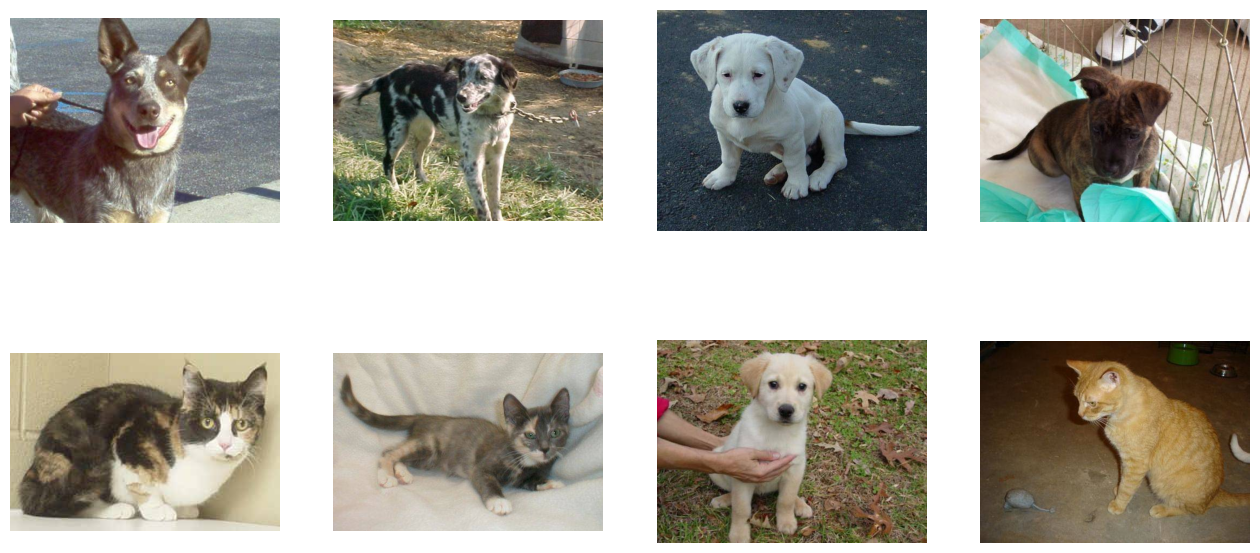

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(16,16))

images = os.listdir(train_path)
for i in range(8):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    fig.axis('off')
    img = mpimg.imread(os.path.join(train_path, img)) 
    fig.imshow(img) 

In [7]:
os.listdir(train_path)[:20]

['dog.11164.jpg',
 'cat.12343.jpg',
 'dog.11072.jpg',
 'cat.9342.jpg',
 'dog.11951.jpg',
 'dog.8485.jpg',
 'dog.4985.jpg',
 'dog.9910.jpg',
 'dog.4822.jpg',
 'dog.2790.jpg',
 'cat.7495.jpg',
 'cat.8363.jpg',
 'dog.7663.jpg',
 'dog.10726.jpg',
 'dog.8670.jpg',
 'dog.7896.jpg',
 'cat.9589.jpg',
 'cat.10334.jpg',
 'cat.1140.jpg',
 'dog.11938.jpg']

**Creating Directories to organize our Data**

In [8]:
try:
    parent_dir = '/kaggle/working/cats-v-dogs'
    os.mkdir(parent_dir)

    for dir in ['training', 'validation']:
        path = os.path.join(parent_dir , dir)
        os.mkdir(path)
        for dir in ['cats', 'dogs']:
            n_path = os.path.join(path , dir)
            os.mkdir(n_path)
except OSError:
    print('Existed')

In [10]:
src_dir = train_path

cats_train_dir = '/kaggle/working/cats-v-dogs/training/cats'
cats_valid_dir = '/kaggle/working/cats-v-dogs/validation/cats'

dogs_train_dir = '/kaggle/working/cats-v-dogs/training/dogs'
dogs_valid_dir = '/kaggle/working/cats-v-dogs/validation/dogs'

# List of cats names in all training images
cats =[img for img in os.listdir(src_dir) if img[:3] == 'cat']

# List of dogs names in all training images
dogs =[img for img in os.listdir(src_dir) if img[:3] == 'dog']

# Take 10% of training images for validation    
np.random.seed(100)
cats_valid_sample = random.sample(cats, int(0.1*len(cats))) 
dogs_valid_sample = random.sample(dogs, int(0.1*len(dogs)))

In [11]:
for img in os.listdir(src_dir):
    src_img = os.path.join(src_dir, img)

    if img[:3] == 'cat':
        if img in cats_valid_sample:
            dest_img = os.path.join(cats_valid_dir, img)
        else:
            dest_img = os.path.join(cats_train_dir, img)

    elif img[:3] == 'dog':
        if img in dogs_valid_sample:
            dest_img = os.path.join(dogs_valid_dir, img)
        else:
            dest_img = os.path.join(dogs_train_dir, img)
    if not os.path.exists(dest_img):
        shutil.copyfile(src_img, dest_img)

In [12]:
print('No. of ALL cats : ', len(cats))
print('No. of cats for training: ', len(os.listdir(cats_train_dir)))
print('No. of cats for validation: ', len(os.listdir(cats_valid_dir)))

print('\nNo. of ALL dogs : ', len(dogs))
print('No. of dogs for training: ', len(os.listdir(dogs_train_dir)))
print('No. of dogs for validation: ', len(os.listdir(dogs_valid_dir)))

No. of ALL cats :  12500
No. of cats for training:  11250
No. of cats for validation:  1250

No. of ALL dogs :  12500
No. of dogs for training:  11250
No. of dogs for validation:  1250


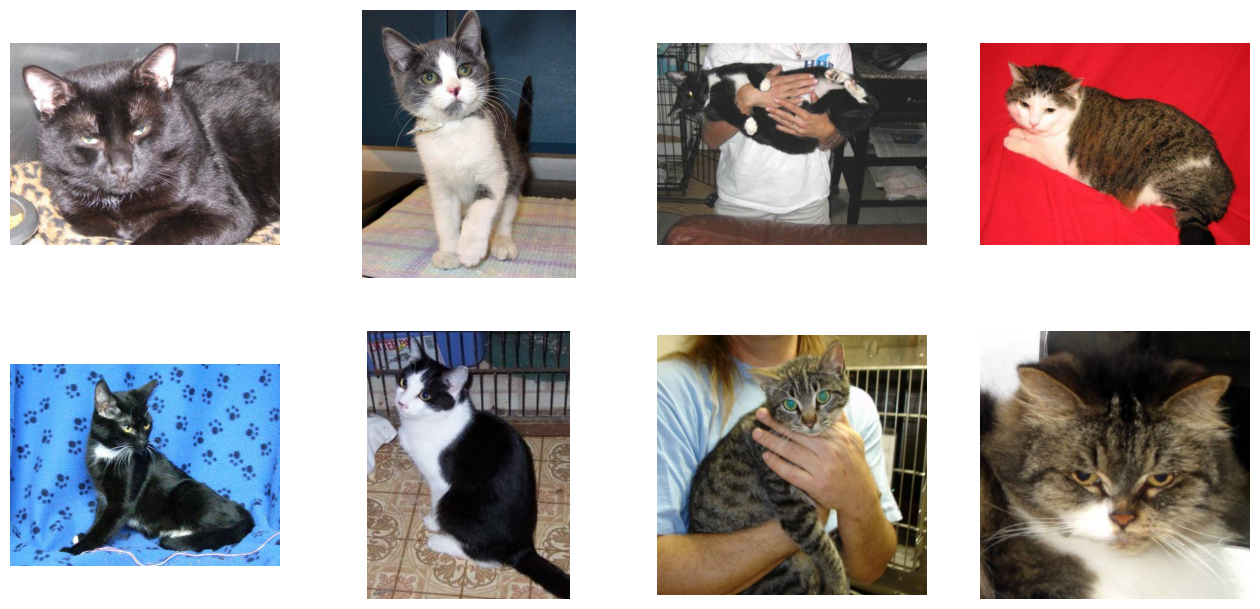

In [14]:
plt.figure(figsize=(16,16))

images = os.listdir(cats_train_dir)
for i in range(8):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    fig.axis('off')
    img = mpimg.imread(os.path.join(cats_train_dir, img)) 
    fig.imshow(img) 

**Image Data Generator**

To flow from directory

Also, we will use it for rescaling

In [15]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)


train_dir = '/kaggle/working/cats-v-dogs/training'
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

valid_dir = '/kaggle/working/cats-v-dogs/validation'
valid_generator = valid_datagen.flow_from_directory(valid_dir,target_size=(150, 150), batch_size=32,class_mode='binary')

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [16]:
print(valid_generator.class_indices)

{'cats': 0, 'dogs': 1}


**According to Tensorflow Docs:**

**Deprecated: tf.keras.preprocessing.image.ImageDataGenerator is not recommended for new code. Prefer loading images with tf.keras.utils.image_dataset_from_directory and transforming the output tf.data.Dataset with preprocessing layers. Check Here**

**However, we will stick with ImageDataGenerator for its simplicity**

**Modelling**

**Base Model**

In [17]:
# create model
model = Sequential([    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                        MaxPooling2D(2, 2),
                        Conv2D(64, (3,3), activation='relu'),
                        MaxPooling2D(2,2),
                        Conv2D(128, (3,3), activation='relu'),
                        MaxPooling2D(2,2),

                        Flatten(),
                        Dense(128, activation='relu'),
                        Dense(1, activation='sigmoid')  ])

# Compile model 
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

**We will fit the model for very few epochs, just for defining the least accuracy we can get**

In [18]:
history = model.fit(train_generator, epochs=5, verbose=1,validation_data=valid_generator)

Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 551s 779ms/step - accuracy: 0.5742 - loss: 0.6822 - val_accuracy: 0.7132 - val_loss: 0.5561
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 560s 776ms/step - accuracy: 0.7536 - loss: 0.4981 - val_accuracy: 0.7944 - val_loss: 0.4535
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 564s 779ms/step - accuracy: 0.8095 - loss: 0.4193 - val_accuracy: 0.7984 - val_loss: 0.4257
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 558s 773ms/step - accuracy: 0.8273 - loss: 0.3843 - val_accuracy: 0.8272 - val_loss: 0.3892
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 563s 774ms/step - accuracy: 0.8603 - loss: 0.3267 - val_accuracy: 0.8476 - val_loss: 0.3657


<Axes: >

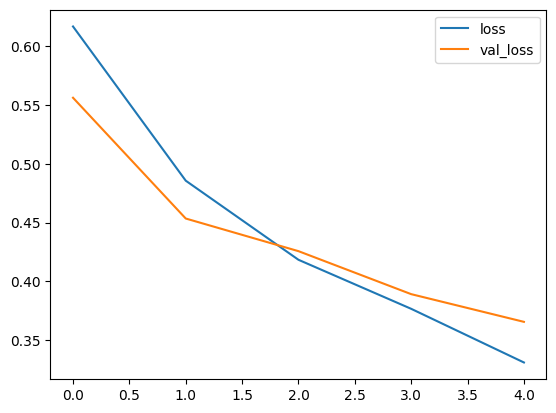

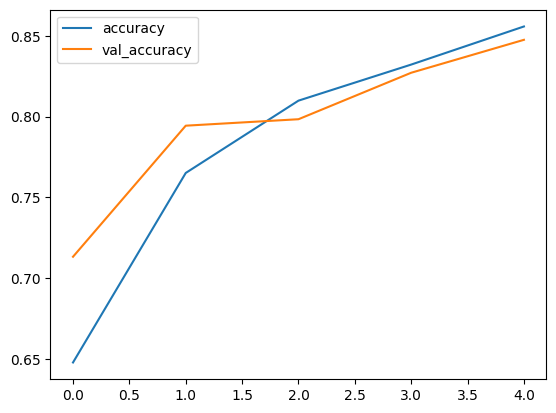

In [20]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()

In [21]:
train_acc = model.evaluate(train_generator)[1]
valid_acc = model.evaluate(valid_generator)[1]
print("Our Base Model Accuracy on Training Data: ", train_acc)
print("Our Base Model Accuracy on Validation Data: ", valid_acc)

704/704 ━━━━━━━━━━━━━━━━━━━━ 167s 238ms/step - accuracy: 0.8948 - loss: 0.2683
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 236ms/step - accuracy: 0.8424 - loss: 0.3740
Our Base Model Accuracy on Training Data:  0.893155574798584
Our Base Model Accuracy on Validation Data:  0.847599983215332


**Some Overfitting**

**We will try using Data Augmentation to overcome it**

**Data Augmentation on the fly**

**A technique of artificially increasing the training set by creating modified copies of a dataset using existing data.**


**Increase the diversity of your training set by applying random (but realistic) transformations, such as image rotation
Enlarge dataset**


**Avoid Overfitting**

In [22]:
aug_train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=90,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1/255)

train_dir = '/kaggle/working/cats-v-dogs/training'
aug_train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

valid_dir = '/kaggle/working/cats-v-dogs/validation'
valid_generator = valid_datagen.flow_from_directory(valid_dir,target_size=(150, 150), batch_size=32,class_mode='binary')

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


**Augmented Model**

In [23]:
my_callbacks = [ EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001),
                 ModelCheckpoint('/kaggle/working/weights.best.hdf5', monitor='val_loss', save_best_only=True)]

# create model
aug_model = Sequential([    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                            MaxPooling2D(2, 2),
                            Conv2D(64, (3,3), activation='relu'),
                            MaxPooling2D(2,2),
                            Conv2D(128, (3,3), activation='relu'),
                            MaxPooling2D(2,2),

                            Flatten(),
                            Dense(128, activation='relu'),
                            Dense(1, activation='sigmoid')  ])

# load weights if exists
if os.path.exists("/kaggle/working/weights.best.hdf5"):
    aug_model.load_weights("weights.best.hdf5")

# Compile model 
aug_model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])
aug_model.summary()

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=/kaggle/working/weights.best.hdf5

In [24]:
aug_history = aug_model.fit(aug_train_generator, epochs=5, verbose=1,validation_data=valid_generator, callbacks = my_callbacks)

NameError: name 'aug_model' is not defined

In [25]:
history_df = pd.DataFrame(aug_history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()

NameError: name 'aug_history' is not defined

In [26]:
train_acc = aug_model.evaluate(train_generator)[1]
valid_acc = aug_model.evaluate(valid_generator)[1]
print("Our Augmented Base Model Accuracy on Training Data: ", train_acc)
print("Our Augmented Base Model Accuracy on Validation Data: ", valid_acc)

NameError: name 'aug_model' is not defined

**Still Overfitting**

**We may try more Regularization**

**More Complex Model**

**More Layers**

**Batch Normalization**

**Dropout**

In [ ]:
my_callbacks = [ EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001),
                 ModelCheckpoint('/kaggle/working/weights2.best.hdf5', monitor='val_loss', save_best_only=True)]

# create model
new_model = Sequential([    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                            MaxPooling2D(2, 2),
                            Conv2D(64, (3,3), activation='relu'),
                            MaxPooling2D(2,2),
                            Conv2D(128, (3,3), activation='relu'),
                            MaxPooling2D(2,2),
                            Conv2D(128, (3,3), activation='relu'),
                            MaxPooling2D(2,2),
                            Flatten(),
                            BatchNormalization(),
                            Dense(128, kernel_regularizer = L2(0.15), bias_regularizer=L2(0.15), activation='relu'),
                            Dropout(rate = 0.5 , seed = 40),
                            Dense(1, activation='sigmoid')  ])

# load weights if exists
if os.path.exists("/kaggle/working/weights2.best.hdf5"):
    new_model.load_weights("weights2.best.hdf5")
    
    # Compile model 
new_model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])
new_model.summary()

In [ ]:
new_history = new_model.fit(aug_train_generator, epochs=20, verbose=1,validation_data=valid_generator, callbacks = my_callbacks)

In [ ]:
history_df = pd.DataFrame(new_history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()

In [ ]:
train_acc = new_model.evaluate(train_generator)[1]
valid_acc = new_model.evaluate(valid_generator)[1]
print("Our New Model Accuracy on Training Data: ", train_acc)
print("Our New Model Accuracy on Validation Data: ", valid_acc)

**Sounds Good!**

**We can go farther use More Epochs**

**As we use ModelCheckpoint callback, the model will start from the final best weights stoed before**

In [ ]:
new_history = new_model.fit(aug_train_generator, epochs=20, verbose=1,validation_data=valid_generator, callbacks = my_callbacks)

In [ ]:
history_df = pd.DataFrame(new_history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()

In [ ]:
train_acc = new_model.evaluate(train_generator)[1]
valid_acc = new_model.evaluate(valid_generator)[1]
print("Our New Model Accuracy on Training Data: ", train_acc)
print("Our New Model Accuracy on Validation Data: ", valid_acc)

**Nice!**

**Let's try Transfer Learning**

**Transfer Learning**

**A technique where knowledge learned from a task is re-used in order to boost performance on a related task.**

**The pre-trained models are usually trained on massive datasets that are a standard benchmark. The weights obtained from the models can be reused in other tasks.**

**Transfer learning is particularly very useful when you have a small training dataset.**

**Why use transfer learning?**

**training models with high accuracy requires a lot of data. For example, the ImageNet dataset contains over 1 million images. In the real world, you are unlikely to have such a large dataset.**

**assuming that you had that kind of dataset, you might still not have the resources required to train a model on such a large dataset.
even if you had the compute resources, you still have to wait for days or weeks to train such a model.**

**Examples of Pre-trained Models:**

**training models with high accuracy requires a lot of data. For example, the ImageNet dataset contains over 1 million images. In the real world, you are unlikely to have such a large dataset.**

**assuming that you had that kind of dataset, you might still not have the resources required to train a model on such a large dataset.**

**even if you had the compute resources, you still have to wait for days or weeks to train such a model.**

**How you can use pre-trained models**

**There are three ways to use a pre-trained model:**

**Prediction.**

**Feature Extraction.**

**Fine-tuning.**

**Here, we will use it for Feature Extraction**

**I will use the model included in this Notebook from Tensorflow Specialization on Coursera**

In [19]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /kaggle/working//inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-04-01 15:31:14--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.207, 64.233.189.207, 108.177.97.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: '/kaggle/working//inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

/kaggle/working//in 100%[===================>]  83.84M  24.1MB/s    in 3.9s    

2024-04-01 15:31:18 (21.2 MB/s) - '/kaggle/working//inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5' saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/kaggle/working/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

In [ ]:
# Choose `mixed7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)

# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)         

# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

In [ ]:
# Set the training parameters
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
my_callbacks = [ EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001),
                 ModelCheckpoint('/kaggle/working/weights_tf.best.hdf5', monitor='val_loss', save_best_only=True)]

# Train the model.
history = model.fit(aug_train_generator, epochs=20, verbose=1,validation_data=valid_generator, callbacks = my_callbacks)

In [ ]:
train_acc = model.evaluate(train_generator)[1]
valid_acc = model.evaluate(valid_generator)[1]
print("Transfer Learning Model Accuracy on Training Data: ", train_acc)
print("Transfer Learning Model Accuracy on Validation Data: ", valid_acc)
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()

In [ ]:
model.save('/kaggle/working/inception_model.keras')

**Predictions on Test Data**

In [ ]:
! unzip -q /kaggle/input/dogs-vs-cats/test1.zip

In [ ]:
test_dir = '/kaggle/working/test1'

plt.figure(figsize=(16,16))
images = os.listdir(test_dir)
for i in range(8):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    fig.axis('off')
    img = mpimg.imread(os.path.join(test_dir, img)) 
    fig.imshow(img) 

**Preparing for Test Images**

In [ ]:
from tensorflow.keras.preprocessing import image

def convert_one_img(img_folder, img):
  # dimensions of image
    img_width, img_height = 150, 150
    img = os.path.join(img_folder, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255

    return img

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/kaggle/working/inception_model.keras')

def predict_visualize_img(img_folder, img, model):
    img_fig = mpimg.imread(os.path.join(img_folder, img)) 
    plt.imshow(img_fig)
    
    img_prepared = convert_one_img(img_folder, img)
    pred = model.predict(img_prepared)[0][0]
    if pred <= 0.5:
        result = 'Predicted : Cat'
    else:
        result = 'Predicted : Dog'
    
    plt.title(result)
    return pred

In [ ]:
predict_visualize_img(test_dir, os.listdir(test_dir)[10], model)

In [ ]:
def convert_imgs_to_tensors(img_folder):

  # load all images into a list
  images = []

  for img in os.listdir(img_folder):
    img = convert_one_img(img_folder, img)
    images.append(img)

  # stack up images list to pass for model
  images = np.vstack(images)

  return images

In [ ]:
test_images_prepared = convert_imgs_to_tensors(test_dir)

In [ ]:
pred_test_images = (model.predict(test_images_prepared) > 0.5).astype('int')

**Create DataFrame Similar to Submission CSV File**

In [ ]:
test_data = os.listdir(test_dir)
test_df = pd.DataFrame({ "id" : test_data})
test_df['id'] = test_df['id'].str.split('.').str[0]
test_df['label'] = pred_test_images
test_df.head()

In [ ]:
test_df.to_csv('/kaggle/working/my_first_preds.csv')